In [6]:
import matplotlib.pyplot as plt
import random as random
from math import dist
from collections import Counter

def generate_data_from_file():
    file_path = "C:\\Users\\NedyaIbrahim-AI23GBG\\Documents\\Github\\Python-Nedya-Ibrahim\\data\\datapoints.txt"
    """
    Read, clean and process data from datapoint.txt.
    """

    data = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}

    with open(file_path, "r") as file_r:
        rows = file_r.readlines()[1:] # Read all the lines from the file and skip the first line (header).

# Iterate through each row in the file and process the data.l,
        for row in rows:
            elements = row.strip("\n").split(", ")
            width, height, label = map(float, elements) # Convert the elements to floating-point numbers (width and height are expected to be floats).

            if label == 1:# Add width and height to the appropriate list based on the label.
                data["pikachu"]["width"].append(width)
                data["pikachu"]["height"].append(height)
            else:
                data["pichu"]["width"].append(width)
                data["pichu"]["height"].append(height)

    return data # Return the organized data dictionary with data for ()"pikachu" and "pichu).

def generate_testdata_from_file():
    file_path = "C:\\Users\\NedyaIbrahim-AI23GBG\\Documents\\Github\\Python-Nedya-Ibrahim\\data\\testpoints.txt"
    """
    Read and process testpoints from testpoints.txt.
    """
    test_data = {"undefined": {"width": [], "height": []}}

    with open(file_path, "r") as file_r:
        rows = file_r.readlines()[1:]  # Read all lines in the file and skip the first line.

        for row in rows:
            elements = row[4:-2].split(", ")
            width, height = map(float, elements)  # Convert the elements to floating-point numbers.
            test_data["undefined"]["width"].append(width)
            test_data["undefined"]["height"].append(height)

    return test_data

"""
    This function is used to create a scatterplot of width and height measurements/n
      for different types of Pokémon
    """

def plot_data(data, test_data=None, incorrect_predictions=None):
    datasets = [
        (data["pikachu"], "blue", "Pikachus"),
        (data["pichu"], "red", "Pichus")
    ]

# If test data is available, add datasets for "Undefined" (green), "Pikachus" (blue), and "Pichus" (green).
    if test_data:
        for category, color in [("undefined", "green"), ("pikachu", "blue"), ("pichu", "green")]:
            category_data = test_data.get(category)
            if category_data:
                datasets.append((category_data, color, f"Undefined ({category.capitalize()})"))

# If there are incorrect predictions, add datasets for "Incorrect" (yellow) for "Pikachus" and "Pichus" (orange).
    if incorrect_predictions:
        for category, color in [("pikachu", "yellow"), ("pichu", "orange")]:
            category_data = incorrect_predictions.get(category)
            if category_data:
                datasets.append((category_data, color, f"Incorrect (actual {category.capitalize()})"))
                
# Plot a scatterplot for each dataset with respective color and label.
    for dataset, color, label in datasets:
        plt.scatter(dataset["width"], dataset["height"], color=color, label=label)

# Set the title and axes for the plot.
    plt.title("Scatterplot of Pokemon")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.legend()  # Add a legend to show which color represents which category.

""" handling user input"""

def clean_user_input():# Split the user's input into a list using commas as separators.
    while True:
        user_input = input("Input a manual point for categorization, following the format 'width, height' (x, y), and optionally specify a third number for the number of votes (default: 1):")
        
        user_input = user_input.split(",")# Check if the length of the input list is not 2 or 3.
        if len(user_input) < 2 or len(user_input) > 3:
            print("Input not recognized. Please provide 2-3 positive numbers separated by commas.")
            continue
        
        try:  # Convert the first two input elements to floating-point numbers (width and height)
            width = float(user_input[0].strip())
            height = float(user_input[1].strip())
            amount_votes = int(user_input[2].strip()) if len(user_input) == 3 else 1

            # Check if width, height, and amount of votes are greater than zero.
            if width <= 0 or height <= 0 or amount_votes <= 0:
                print("Input not recognized.. Please provid positive numbers only.")
                continue
           
            return width, height, amount_votes # Return the valid user input (width, height, amount of votes.

        except ValueError as err: # Handle any conversion errors and prompt the user for valid input.
            print("Input not recognized. Please provid 2-3 valid positive numbers.")


            """Categorize a point (x, y) based on its proximity to data points.
    Return the category (str) and certainty (float) of the categorization.
    """

# Categorize a point based on its nearest neighbors in the data.
def categorize_point(point, data, amount_votes=1):
    distances = [] 
    
   
# Iterate through categories ("pikachu" and "pichu).
    for category in ["pikachu", "pichu"]:
        width_values = data[category]["width"]
        height_values = data[category]["height"]

        # Calculate distances between the given point and data points in the current category.
        category_distances = [dist((w, h), (point[0], point[1])) for w, h in zip(width_values, height_values)]
        distances.extend([(dist, category) for dist in category_distances])

    # Sort distances in ascending order based on distance values.
    distances.sort(key=lambda x: x[0])
    distances = distances[:amount_votes]

     # Count the votes for each category among the nearest neighbors.
    category_votes = [category for _, category in distances]
    vote_counts = Counter(category_votes)

    # Calculate the certainty of the categorization based on the number of votes.
    most_common_category, votes = vote_counts.most_common(1)[0]
    
    #Provide the category with the highest occurrence and a confidence measure, determined by dividing the number of votes by the total votes counted.
    certainty = votes / amount_votes
    return most_common_category, certainty

"""
    Split the data into test and training datasets randomly.
    Return test_data and training_data dictionaries.
    """

def generate_test_training_data(data):# Initialize dictionaries to store test and training data for "pikachu" and "pichu.
    test_data = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}
    training_data = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}
    
# Create a list of all indices from 0 to 74 (total of 75 indices.
    all_indices = list(range(75))

# Select 25 random indices from the list for test points related to "pikachu.
    random_point_pikachu = random.sample(all_indices, 25)

# For each category ("pikachu" and "pichu"), create separate test and training datasets.
    for category in ["pikachu", "pichu"]:
        test_indices = random.sample(random_point_pikachu, 25)
        training_indices = [i for i in all_indices if i not in test_indices]

# Populate the test data dictionary with width and height values for the current category.
        test_data[category]["width"] = [data[category]["width"][i] for i in test_indices]
        test_data[category]["height"] = [data[category]["height"][i] for i in test_indices]

# Populate the training data dictionary with width and height values for the current category.
        training_data[category]["width"] = [data[category]["width"][i] for i in training_indices]
        training_data[category]["height"] = [data[category]["height"][i] for i in training_indices]

  # Return the generated test and training data dictionaries.
    return test_data, training_data

"""Perform a classification analysis of the test data, calculate accuracy,
 and provide insights into the number of correct and incorrect categorizations"""


def calculate_accuracy(test_data, data, amount_votes=1):
    # Initialize dictionaries to track incorrect and correct predictions.
    incorrect_predictions = {"pikachu": {"width": [], "height": []}, "pichu": {"width": [], "height": []}}
    correct_predictions = {"pikachu": 0, "pichu": 0}

# Loop through categories "pikachu" and "pichu" in the test data.
    for category in ["pikachu", "pichu"]:
        width_values = test_data[category]["width"]
        height_values = test_data[category]["height"]

# For each data point, classify it and check if the result matches the category.
        for i in range(len(width_values)):
            result, _ = categorize_point([width_values[i], height_values[i]], data, amount_votes)

# Increment correct predictions if the result matches the category, otherwise record the incorrect prediction.
            if result == category:
                correct_predictions[category] += 1
            else:
                incorrect_predictions[category]["width"].append(width_values[i])
                incorrect_predictions[category]["height"].append(height_values[i])

 # Calculate TP, TN, FP, FN, and accuracy.
    TP = correct_predictions["pikachu"]
    TN = correct_predictions["pichu"]
    FP = len(incorrect_predictions["pichu"]["width"])
    FN = len(incorrect_predictions["pikachu"]["width"])

    accuracy = (TP + TN) / (TP + TN + FP + FN)

# Return accuracy, TP, TN, FP, FN, and information about incorrect predictions.
    return accuracy, TP, TN, FP, FN, incorrect_predictions

**Datafiles working with**


In [7]:
# Read in datapoints file and store as data.
data = generate_data_from_file() 
# Read in testpoints file and store as test_data.
test_data = generate_testdata_from_file() 

**Plota data and testpoints**

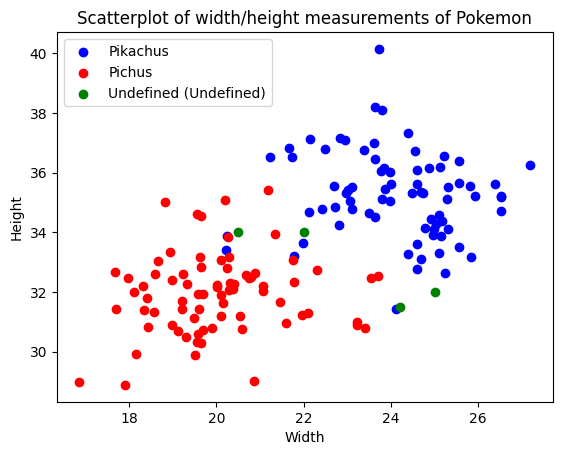

In [4]:
data = generate_data_from_file()  # Read in datapoints file and store as data.
test_data = generate_testdata_from_file()  # Read in testpoints file and store as test_data.
plot_data(data, test_data)  # Plot data and test data points.

**Determine the distance between a test point and a training point**

In [6]:
"""Majority vote of 1"""
data = generate_data_from_file() # Read in datapoints file and store as data.
test_data = generate_testdata_from_file() # Read in testpoints file and store as test_data.
amount_votes = 1 #number of nearest points to consider for majority vote.

# Iterate through undefined test data points for categorization.
for i in range(len(test_data["undefined"]["width"])):
    width = test_data["undefined"]["width"][i]
    height = test_data["undefined"]["height"][i]
    
# Use the categorize_point function to classify the data point based on the main data and specified amount of votes.
    result, certainty = categorize_point([width, height], data, amount_votes)

 # Print the categorization result and certainty for the current data point.
    print(f"Point ({width}, {height}) calculated as \"{result.capitalize()}\"")
    print(f"({certainty * 100:.1f}% certainty based on a majority vote of {amount_votes})\n")

Point (25.0, 32.0) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (24.2, 31.5) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (22.0, 34.0) calculated as "Pikachu"
(100.0% certainty based on a majority vote of 1)

Point (20.5, 34.0) calculated as "Pichu"
(100.0% certainty based on a majority vote of 1)



In [4]:
"""Majority vote of 10"""
data = generate_data_from_file() # Read in datapoints file and store as data.
test_data = generate_testdata_from_file() # Read in testpoints file and store as test_data.
amount_votes = 10 #number of nearest points to consider for majority vote.

# Iterate through undefined test data points for categorization.
for i in range(len(test_data["undefined"]["width"])):
    width = test_data["undefined"]["width"][i]
    height = test_data["undefined"]["height"][i]
    
    # Use the categorize_point function to classify the data point based on the main data and specified amount of votes.
    result, certainty = categorize_point([width, height], data, amount_votes)

 # Print the categorization result and certainty for the current data point.
    print(f"Point (width, height): ({width}, {height}) classified as {result.capitalize()}")
    print(f"({certainty * 100:.1f}% certainty based on a majority vote of {amount_votes})\n")

Point (width, height): (25.0, 32.0) classified as Pikachu
(80.0% certainty based on a majority vote of 10)

Point (width, height): (24.2, 31.5) classified as Pikachu
(50.0% certainty based on a majority vote of 10)

Point (width, height): (22.0, 34.0) classified as Pikachu
(70.0% certainty based on a majority vote of 10)

Point (width, height): (20.5, 34.0) classified as Pichu
(80.0% certainty based on a majority vote of 10)



**Input a point for categorization manually**

In [11]:
data = generate_data_from_file() # Read in datapoints file and store as data.

user_input = clean_user_input()# Get user input for a data point and clean it.

# Use the categorize_point function to classify the user-provided data point.
result = categorize_point([user_input[0], user_input[1]], data, user_input[2]) 
# Print the classification result and certainty for the user-provided data point.

print(f"Width, height ({width}, {height}) calculated as '{result}' with {certainty * 100:.1f}% certainty based on {amount_votes} votes")

Input not recognized. Please provide 2-3 positive numbers separated by commas.
Width, height (20.5, 34.0) calculated as '('pichu', 1.0)' with 80.0% certainty based on 10 votes


**Randomly divide the initial dataset into separate test and training datasets**
- Calculate the accuracy of predicted categories and Plot a graph of test and training points

Accuracy of categorization: 98.0%
Correct predictions: Pikachu 25/26, Pichu 24/24 (based on a majority vote of 10)


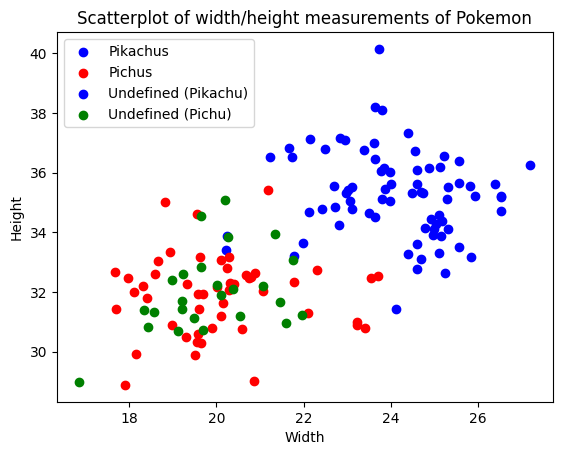

In [5]:
data = generate_data_from_file() # Read in datapoints file and store as data.
test_data, training_data = generate_test_training_data(data) # Create test and training data from the main data.
amount_votes = 10 # Set the number of votes.

plot_data(training_data, test_data) 

# Calculate accuracy and related metrics for test data.
accuracy, TP, TN, FP, FN, incorrect_predictions = calculate_accuracy(test_data, training_data, amount_votes)

# Print the accuracy and detailed results.
print(f"Accuracy of categorization: {accuracy * 100:.1f}%") 
print(f"Correct predictions: Pikachu {TP}/{TP + FP}, Pichu {TN}/{TN + FN} (based on a majority vote of {amount_votes})")

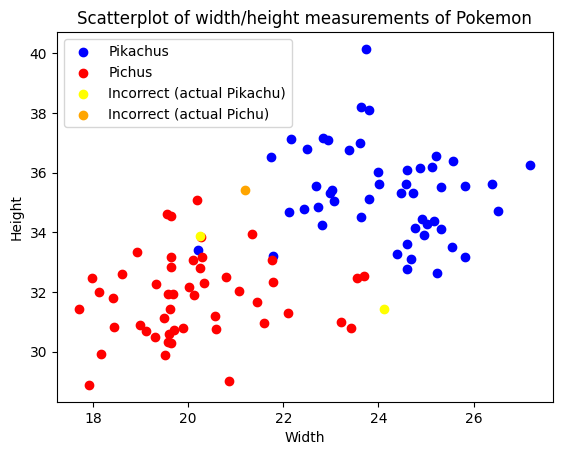

In [22]:
plot_data(training_data, incorrect_predictions = incorrect_predictions) 

**Visualize the accuracy of multiple test and training dataset pairs**

The dataset is split into test and training data, and we then measure how accurately the test data can be categorized compared to the training data. This accuracy is represented graphically, and we calculate the average accuracy over multiple simulation sets for a more comprehensive assessment.

Prediction accuracy of simulation 1: 98.0% - Correct predictions: Pikachu 25/26, Pichu 24/24
Prediction accuracy of simulation 2: 98.0% - Correct predictions: Pikachu 24/24, Pichu 25/26
Prediction accuracy of simulation 3: 98.0% - Correct predictions: Pikachu 25/26, Pichu 24/24
Prediction accuracy of simulation 4: 96.0% - Correct predictions: Pikachu 24/25, Pichu 24/25
Prediction accuracy of simulation 5: 96.0% - Correct predictions: Pikachu 24/25, Pichu 24/25
Prediction accuracy of simulation 6: 96.0% - Correct predictions: Pikachu 23/23, Pichu 25/27
Prediction accuracy of simulation 7: 90.0% - Correct predictions: Pikachu 21/22, Pichu 24/28
Prediction accuracy of simulation 8: 94.0% - Correct predictions: Pikachu 24/26, Pichu 23/24
Prediction accuracy of simulation 9: 96.0% - Correct predictions: Pikachu 24/25, Pichu 24/25
Prediction accuracy of simulation 10: 96.0% - Correct predictions: Pikachu 24/25, Pichu 24/25

Average accuracy of all 10 simulations: 95.8%


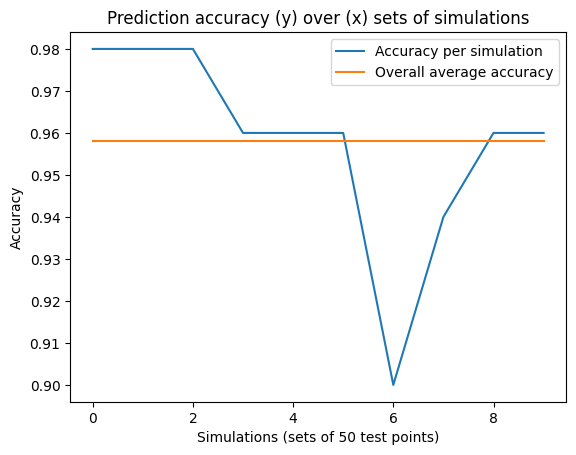

In [7]:
amount_simulations = 10 # amount of simulations sets to run.
amount_votes = 10 # amount of closest points to consider for majority vote.
accuracy_list = [] # stores accuracy results from each simulation set.


for i in range(amount_simulations):
    data = generate_data_from_file() # read in datapoints file and store as data.
    test_data, training_data = generate_test_training_data(data) # split datapoints in data randomly into 2 groups; test and training data.

    # categorize points of test data compared to training data, and calculate accuracy of predictions.
    accuracy, TP, TN, FP, FN, incorrect_predictions = calculate_accuracy(test_data, training_data, amount_votes)
    accuracy_list.append(accuracy) # append accuracy results to list.
    
    # print results of current simulation.  
    print(f"Prediction accuracy of simulation {i + 1}: {accuracy * 100:.1f}% - Correct predictions: Pikachu {TP}/{TP + FP}, Pichu {TN}/{TN + FN}")

average_accuracy = sum(accuracy_list) / len(accuracy_list) # calculate average accuracy (across all sets of simulations).

# plot results:
plt.plot(accuracy_list, label = "Accuracy per simulation")
plt.plot(range(amount_simulations), [average_accuracy for i in range(amount_simulations)], label = "Overall average accuracy")
plt.title("Prediction accuracy (y) over (x) sets of simulations")
plt.xlabel("Simulations (sets of 50 test points)")
plt.ylabel("Accuracy")
plt.legend()

print(f"\nAverage accuracy of all {amount_simulations} simulations: {average_accuracy * 100:.1f}%")